In [1]:
import torch
import fire
import os
import json
from transformers import AutoModelForCausalLM, AutoTokenizer
import accelerate
from functools import partial
from datasets import load_dataset
from tqdm import tqdm
import numpy as np
from accelerate.utils import is_xpu_available
from typing import Iterable, List, Optional, Tuple
from torch import Tensor


KeyboardInterrupt: 

In [ ]:
model_full_name="meta-llama/Llama-2-7b-hf"


model = AutoModelForCausalLM.from_pretrained(
    model_full_name,
    torch_dtype=torch.bfloat16,
    load_in_4bit=True,
    # attn_implementation="flash_attention_2", #accelerate
    # device_map="auto",
    device_map="balanced",#"auto", "balanced", "balanced_low_0", "sequential"
    # device_map='cuda:0',
)

tokenizer = AutoTokenizer.from_pretrained(model_full_name, padding_side='left')
tokenizer.pad_token = tokenizer.eos_token



In [16]:
from datasets import load_dataset, Dataset

dataset_name="mosaicml/dolly_hhrlhf"

data1 = load_dataset(dataset_name)

# data = data['train']

# filtered_dataset = data.filter(lambda example: example['dataset'] == 'flan_v2')


Generating train split:   0%|          | 0/59310 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5129 [00:00<?, ? examples/s]

In [29]:
data1['train']

Dataset({
    features: ['prompt', 'response'],
    num_rows: 59310
})

In [ ]:
filtered_dataset

Dataset({
    features: ['dataset', 'id', 'messages'],
    num_rows: 49123
})

In [ ]:
filtered_dataset[0]

{'dataset': 'flan_v2',
 'id': 'flan_v2_0',
 'messages': [{'role': 'user',
   'content': 'Question: Gdańsk (, ; German: "" , ) is a Polish city on the Baltic coast. It is the capital of the Pomeranian Voivodeship, Poland\'s principal seaport and is also the centre of the country\'s fourth-largest metropolitan area. \n\nThe city lies on the southern edge of Gdańsk Bay (of the Baltic Sea), in a conurbation with the city of Gdynia, spa town of Sopot, and suburban communities, which together form a metropolitan area called the Tricity ("Trójmiasto"), with a population approaching 1.4 million. Gdańsk itself has a population of 460,427 (December 2012), making it the largest city in the Pomerania region of Northern Poland. \n\nGdańsk is the capital of Gdańsk Pomerania and the largest city of Kashubia. With its origins as a Polish stronghold erected in the 980s by Mieszko I of Poland, the city\'s history is complex, with periods of Polish rule, periods of Prussian or German rule, and periods of

In [3]:
!conda install numpy

Channels:
 - defaults
 - conda-forge
 - anaconda
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /anaconda/envs/azureml_py38

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.26.4               |   py39h5f9d8c6_0          10 KB
    numpy-base-1.26.4          |   py39hb5e798b_0         7.2 MB
    ------------------------------------------------------------
                                           Total:         7.2 MB

The following NEW packages will be INSTALLED:

  numpy-base         pkgs/main/linux-64::numpy-base-1.26.4-py39hb5e798b_0 

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2024.6.2~ --> pkgs/main::ca-certificates-2024.7.2-h06a4308_0 
  numpy               anaconda::numpy-1.23.5-py39hf6e8229_1 --> pkgs/main::numpy-1.26.4-py39h5f9d8c6_0 


Procee

## Split the TULU dataset

In [1]:
from datasets import load_dataset, DatasetDict
import torch
# 加载数据集
dataset_name = "allenai/tulu-v2-sft-mixture"
data = load_dataset(dataset_name)

# 假设我们处理的是训练集
train_dataset = data['train']

# 定义函数来按键分割数据集
def split_by_key(dataset, key):
    unique_values = dataset.unique(key)
    split_datasets = {}
    for value in unique_values:
        split_datasets[value] = dataset.filter(lambda x: x[key] == value)
    return DatasetDict(split_datasets)

# 使用函数按 'dataset' 列分割数据集
split_datasets = split_by_key(train_dataset, 'dataset')

# 查看结果
for key, sub_dataset in split_datasets.items():
    print(f"Subset for {key}:")
    print(sub_dataset)


torch.save(split_datasets, "tulu_split.pt")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/anaconda/envs/azureml_py38/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/anaconda/envs/azureml_py38/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/azureml_py38/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/azureml_py38/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/anaconda/envs/azureml_py38/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/anaconda/envs/azureml_py38/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/azureml_py38/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/azureml_py38/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.s

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [8]:
split_datasets.keys()

dict_keys(['flan_v2', 'cot', 'oasst1', 'lima', 'gpt4_alpaca', 'code_alpaca', 'sharegpt', 'wizardlm', 'open_orca', 'science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation', 'hard_coded'])

In [12]:
split_datasets['gpt4_alpaca'][0]


{'dataset': 'gpt4_alpaca',
 'id': 'gpt4_alpaca_0',
 'messages': [{'role': 'user',
   'content': 'Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nCompose a tweet about a new project you are working on.\n\n### Input:\nI am developing a new web application to help people find local events.\n\n### Response:'},
  {'role': 'assistant',
   'content': "🆕Exciting things are happening! I'm currently working on a brand-new web application that will make finding local events easier than ever. Keep an eye out for updates on my progress! #webapp #localevents #newproject🎉"}]}

In [9]:
split_datasets['cot'][0]



{'dataset': 'cot',
 'id': 'cot_0',
 'messages': [{'role': 'user',
   'content': 'Test for natural language inference.\nPremise: "A costume party in full swing."\nHypothesis: "Everyone at the party is in regular clothes."\nIs the hypothesis entailed by the premise?\nOptions:\n- yes\n- no\n- it is not possible to tell Step by step answer:'},
  {'role': 'assistant',
   'content': 'Everyone is either in a costume or regular clothes at a party. Therefore, the final answer is no.'}]}

In [11]:
split_datasets['oasst1'][0]


{'dataset': 'oasst1',
 'id': 'oasst1_0',
 'messages': [{'role': 'user',
   'content': 'Can you explain contrastive learning in machine learning in simple terms for someone new to the field of ML?'},
  {'role': 'assistant',
   'content': 'Sure! Let\'s say you want to build a model which can distinguish between images of cats and dogs. You gather your dataset, consisting of many cat and dog pictures. Then you put them through a neural net of your choice, which produces some representation for each image, a sequence of numbers like [0.123, 0.045, 0.334, ...]. The problem is, if your model is unfamiliar with cat and dog images, these representations will be quite random. At one time a cat and a dog picture could have very similar representations (their numbers would be close to each other), while at others two cat images may be represented far apart. In simple terms, the model wouldn\'t be able to tell cats and dogs apart. This is where contrastive learning comes in.\n\nThe point of contra

In [ ]:
conversation = ""
for message in train_dataset[0]['messages']: 
    conversation += f"{message['role']}: {message['content']}\n"

In [ ]:
conversation

'user: Question: Gdańsk (, ; German: "" , ) is a Polish city on the Baltic coast. It is the capital of the Pomeranian Voivodeship, Poland\'s principal seaport and is also the centre of the country\'s fourth-largest metropolitan area. \n\nThe city lies on the southern edge of Gdańsk Bay (of the Baltic Sea), in a conurbation with the city of Gdynia, spa town of Sopot, and suburban communities, which together form a metropolitan area called the Tricity ("Trójmiasto"), with a population approaching 1.4 million. Gdańsk itself has a population of 460,427 (December 2012), making it the largest city in the Pomerania region of Northern Poland. \n\nGdańsk is the capital of Gdańsk Pomerania and the largest city of Kashubia. With its origins as a Polish stronghold erected in the 980s by Mieszko I of Poland, the city\'s history is complex, with periods of Polish rule, periods of Prussian or German rule, and periods of autonomy or self-rule as a "free city". Between the world wars, the Free City of 

## Plot the quality label distribution

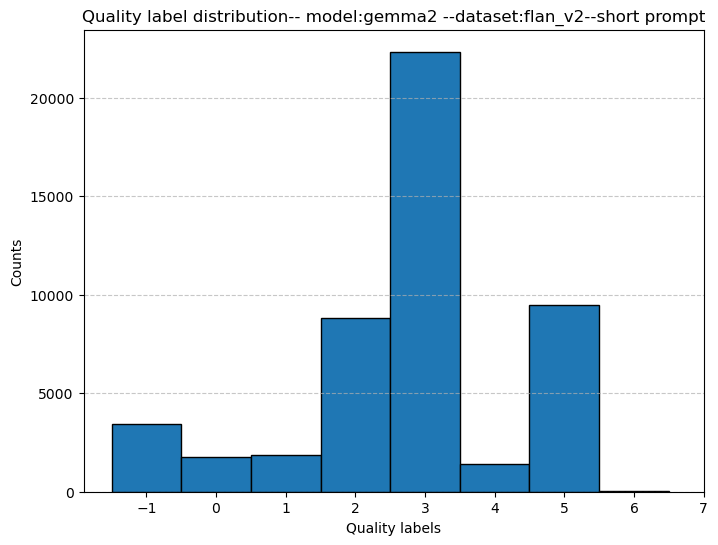

In [4]:
import matplotlib.pyplot as plt
import torch

root_path = '/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/open-instruct/logs/'

model_name = 'gemma'
dataset_name = 'flan_v2'

data_path = root_path + f"/{model_name}/{dataset_name}/output_labels.pt"


labels = torch.load(data_path)


plt.figure(figsize=(8, 6))
plt.hist(labels, bins=range(-1, 8), edgecolor='black', align='left')
plt.xlabel('Quality labels')
plt.ylabel('Counts')
plt.title(f'Quality label distribution-- model:{model_name}2 --dataset:{dataset_name}--short prompt')
plt.xticks(range(-1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.show()


In [2]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

## Quality label distribution

- datasets = ['GAIR/lima', 'mosaicml/dolly_hhrlhf']
- models = ['gemma', 'llama', 'mistral']


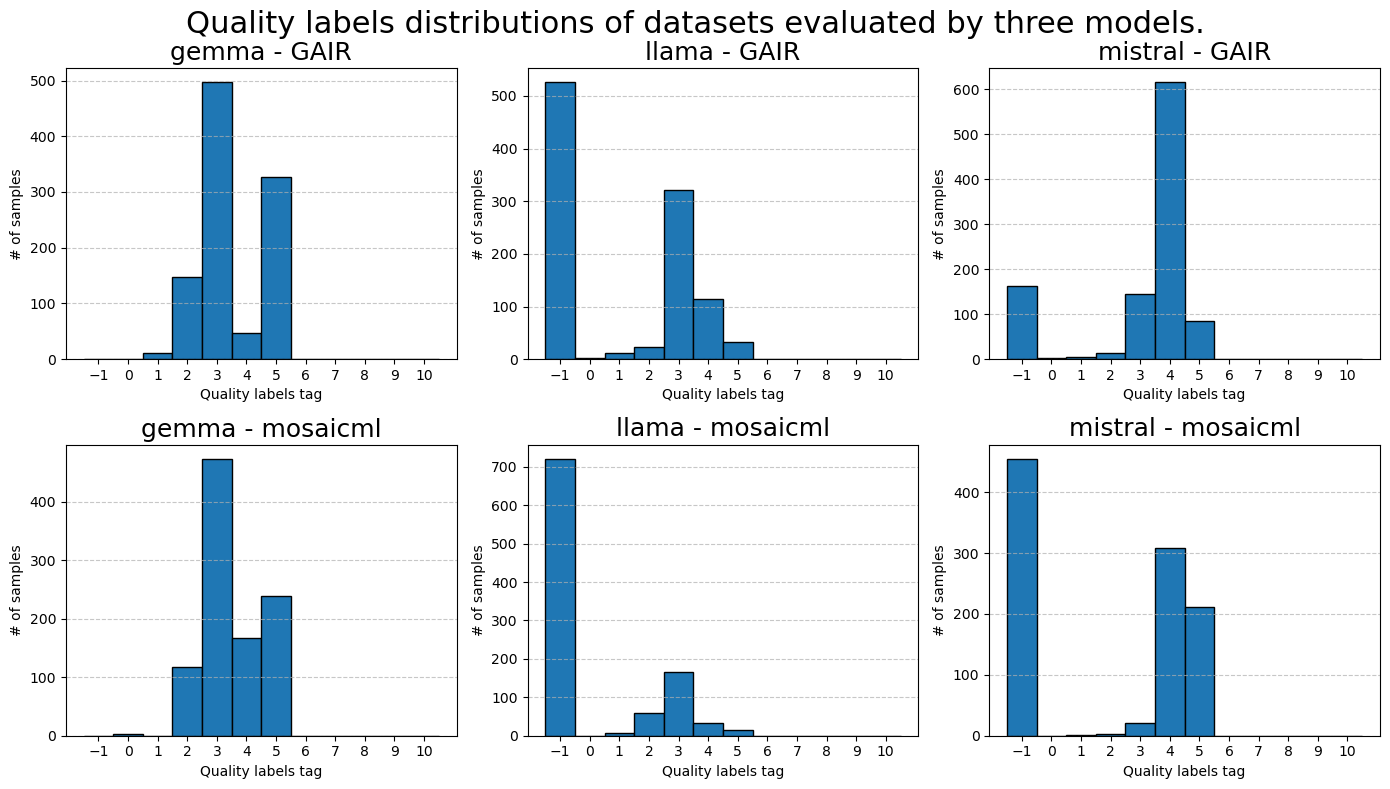

In [1]:
import os
import torch
import matplotlib.pyplot as plt

# 定义文件夹路径
base_path = "/home/azureuser/cloudfiles/code/Users/jinlong.pang/open-instruct/logs/"
models = ['gemma', 'llama', 'mistral']
datasets = ['GAIR/lima', 'mosaicml/dolly_hhrlhf']

# 初始化数据字典
data_dict = {dataset: [] for dataset in datasets}

# 遍历文件夹结构，读取所有 output_labels.pt 文件
for model in models:
    for dataset in datasets:
        file_path = os.path.join(base_path, model, dataset, 'output_labels.pt')
        if os.path.exists(file_path):
            data = torch.load(file_path)
            if isinstance(data, list):
                data_dict[dataset].append((data, model))
            else:
                print(f"File at {file_path} does not contain a list")

# 设置图表
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Quality labels distributions of datasets evaluated by three models.', fontsize=22)

# 绘制子图
for row, dataset in enumerate(datasets):
    for col, (data, model) in enumerate(data_dict[dataset]):
        ax = axs[row, col]
        ax.hist(data, bins=range(-1, 12), edgecolor='black', align='left')
        ax.set_xlabel('Quality labels tag')
        ax.set_ylabel('# of samples')
        ax.set_title(f'{model} - {dataset.split("/")[0]}',fontsize=18)
        ax.set_xticks(range(-1, 11))
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# 调整子图间的距离
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 显示图表
plt.show()


In [15]:
!pip install matplotlib

In [ ]:
import torch 

import os

import matplotlib.pyplot as plt

labels = torch.load("/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/open-instruct/logs/gemma/GAIR/lima/output_labels.pt")


plt.figure(figsize=(8, 6))
plt.hist(labels, bins=range(-1, 8), edgecolor='black', align='left')
plt.xlabel('Quality labels')
plt.ylabel('Counts')
plt.title(f'Quality label distribution-- model:{model_name}2 --dataset:{dataset_name}--short prompt')
plt.xticks(range(-1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.show()

In [2]:
len(labels)

12300

In [4]:
from datasets import load_dataset

data = load_dataset('parquet', data_files='/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/open-instruct/data_refine/tulu_split_parquet/flan_v2.parquet')
dialogs = data['train']

Generating train split: 49123 examples [00:01, 39516.61 examples/s]


In [8]:
data['train']

Dataset({
    features: ['dataset', 'id', 'messages'],
    num_rows: 49123
})

In [5]:
len(dialogs)

49123

In [4]:
import torch 

path = "/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/open-instruct/logs/gemma/flan_v2/output_labels.pt"

labels = torch.load(path)

In [5]:
len(labels)

49123

In [8]:
!conda install Counter

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - counter

Current channels:

  - defaults
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [10]:
from collections import Counter

label_counts = Counter(labels)

In [11]:
label_counts

Counter({3: 22345,
         5: 9472,
         2: 8806,
         -1: 3432,
         1: 1858,
         0: 1759,
         4: 1427,
         6: 8,
         7: 7,
         8: 3,
         17: 1,
         10: 1,
         12: 1,
         18: 1,
         13: 1,
         77: 1})

In [4]:
import torch
import json
file_path = "/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/open-instruct/data/processed/tulu_v2/flan_v2_subset/flan_v2_data.jsonl"
inputs = []
with open(file_path, 'r') as f:
    for line in f:
        data = json.loads(line)
        inputs.append(data)



In [5]:
inputs

[{'dataset': 'flan_v2',
  'id': 'flan_v2_0',
  'messages': [{'role': 'user',
    'content': 'Question: Gdańsk (, ; German: "" , ) is a Polish city on the Baltic coast. It is the capital of the Pomeranian Voivodeship, Poland\'s principal seaport and is also the centre of the country\'s fourth-largest metropolitan area. \n\nThe city lies on the southern edge of Gdańsk Bay (of the Baltic Sea), in a conurbation with the city of Gdynia, spa town of Sopot, and suburban communities, which together form a metropolitan area called the Tricity ("Trójmiasto"), with a population approaching 1.4 million. Gdańsk itself has a population of 460,427 (December 2012), making it the largest city in the Pomerania region of Northern Poland. \n\nGdańsk is the capital of Gdańsk Pomerania and the largest city of Kashubia. With its origins as a Polish stronghold erected in the 980s by Mieszko I of Poland, the city\'s history is complex, with periods of Polish rule, periods of Prussian or German rule, and period

# Performance Comparison

**Dataset: flan_v2**
- finetuned on filtered dataset (~6600 samples)
- finetuned on random selected dataset (~6600 samples)
- finetuned on full data (49123 samples)

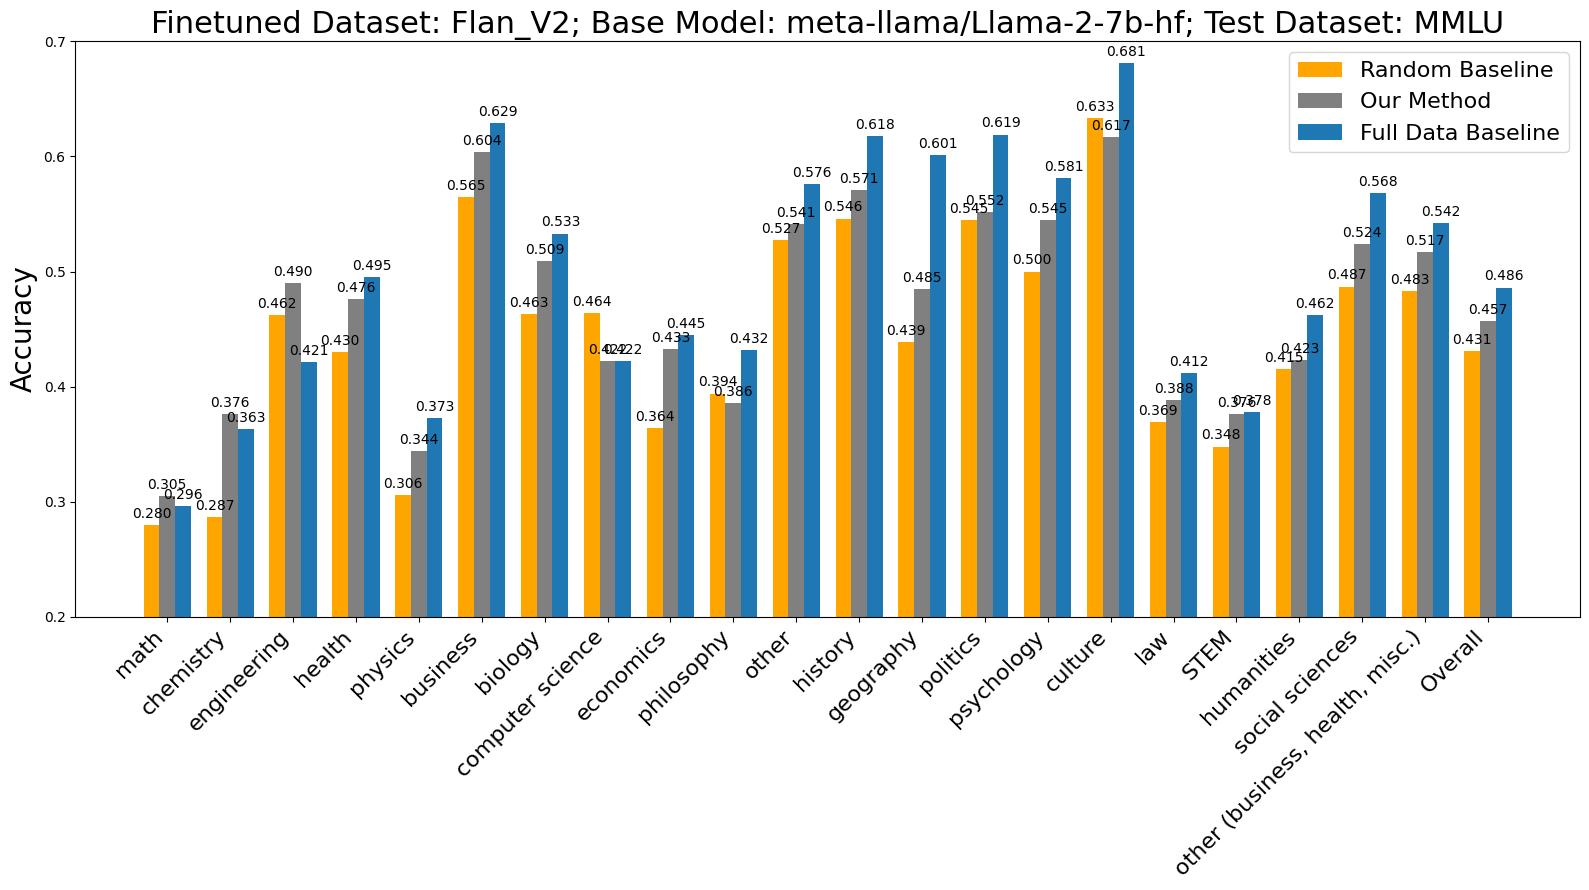

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 定义类别
categories = [
    "math", "health", "physics", "business", "biology", "chemistry",
    "computer science", "economics", "engineering", "philosophy", "other",
    "history", "geography", "politics", "psychology", "culture", "law",
    "STEM", "humanities", "social sciences", "other (business, health, misc.)", 'Overall'
]

############################################################################################################
#first result: labeling model:gemma; 6643 samples
# # Random baseline 的结果
# random_baseline = [
#     0.276, 0.443, 0.325, 0.568, 0.480, 0.356, 0.405, 0.392, 0.503, 0.398,
#     0.515, 0.551, 0.475, 0.549, 0.508, 0.617, 0.380, 0.354, 0.421, 0.499, 0.486, 0.439
# ]

# # Our method 的结果
# our_method = [
#     0.303, 0.455, 0.341, 0.586, 0.487, 0.389, 0.408, 0.389, 0.483, 0.375,
#     0.526, 0.558, 0.449, 0.549, 0.519, 0.611, 0.374, 0.370, 0.411, 0.500, 0.498,0.442
# ]

############################################################################################################
#new label model:llama3; 6600 samples
# random_baseline = [
#     0.230, 0.415, 0.312, 0.515, 0.436, 0.274, 0.405, 0.356, 0.421, 0.364,
#     0.464, 0.537, 0.394, 0.522, 0.464, 0.605, 0.367, 0.316, 0.399, 0.461, 0.446,0.404,
# ]
# # Filtered method 的结果#new label model:llama3
# our_method = [
#     0.269, 0.466, 0.338, 0.574, 0.480, 0.347, 0.405, 0.376, 0.455, 0.378,
#     0.526, 0.552, 0.460, 0.560, 0.518, 0.636, 0.383, 0.351, 0.414, 0.501, 0.502,0.440,
# ]
############################################################################################################
# labeling model: llama3; 3423 examples
# Random baseline 的结果
# random_baseline = [
#     0.264, 0.445, 0.322, 0.549, 0.460, 0.340, 0.379, 0.336, 0.441, 0.379,
#     0.500, 0.532, 0.404, 0.512, 0.503, 0.627, 0.360, 0.338, 0.402, 0.472, 0.479, 0.421
# ]

# # Filtered method 的结果
# our_method = [
#     0.279, 0.467, 0.347, 0.545, 0.471, 0.360, 0.403, 0.389, 0.476, 0.380,
#     0.513, 0.533, 0.455, 0.532, 0.515, 0.620, 0.373, 0.357, 0.408, 0.496, 0.4940, 0.436
# ]


############################################################################################################
# labeling model: llama3; 3423 examples with different embedding model:BAAI-large-en-1.5
# one findings: embedding model take a little bit impact to the model 
# random_baseline = [
#     0.262, 0.431, 0.312, 0.542, 0.452, 0.317, 0.403, 0.344, 0.428, 0.385,
#     0.501, 0.538, 0.404, 0.505, 0.487, 0.642, 0.364, 0.334, 0.407, 0.468, 0.471,0.420
# ]

# # Our method 的结果
# our_method = [
#     0.253, 0.470, 0.328, 0.549, 0.482, 0.343, 0.417, 0.385, 0.434, 0.394,
#     0.535, 0.551, 0.455, 0.554, 0.525, 0.636, 0.373, 0.344, 0.417, 0.505, 0.504,0.440
# ]

############################################################################################################
# labeling model: llama3; 13400 examples with different embedding model:BAAI-large-en-1.5
# Compared to the size of high-rated examples (13400 vs. 3400), one conclusion is that other low-rated examples also contains valuable contents or knowledge; maybe we should sampling some low-rated samples first or do the feature-wise first.
# random_baseline = [
#     0.259, 0.441, 0.311, 0.579, 0.460, 0.300, 0.434, 0.381, 0.448, 0.386,
#     0.529, 0.555, 0.439, 0.529, 0.518, 0.611, 0.364, 0.338, 0.411, 0.492, 0.491, 0.431
# ]

# # Our method 的结果
# our_method = [
#     0.258, 0.463, 0.334, 0.581, 0.489, 0.327, 0.444, 0.412, 0.434, 0.379,
#     0.526, 0.547, 0.485, 0.552, 0.522, 0.617, 0.389, 0.350, 0.416, 0.510, 0.502, 0.442
# ]

############################################################################################################
## use the new feature-based method to generate dataset and also increase the training epoch from 2 to 5
# Finding: we can find that training epoch is more important for now
# feature-based model () with 2 training epoch-- overal accuracy: 0.418
# feature-based model () with 5 training epoch-- overal accuracy: 0.455

# our_method = [
#     0.291, 0.483, 0.331, 0.588, 0.509, 0.353, 0.410, 0.410, 0.434, 0.402,
#     0.550, 0.569, 0.495, 0.539, 0.545, 0.645, 0.384, 0.362, 0.428, 0.518, 0.521, 0.455
# ] 
############################################################################################################
### feature-based model with 5 training epoch + high-rated sample selection
# our_method = [
#     0.264, 0.465, 0.323, 0.542, 0.496, 0.307, 0.425, 0.385, 0.448, 0.387,
#     0.529, 0.571, 0.465, 0.545, 0.515, 0.639, 0.378, 0.347, 0.420, 0.500, 0.498, 0.440
# ]

############################################################################################################
### feature-based model with 5 training epoch + (half threshold-- high-rated sample selection + half--threshold --low-rated sample selection)
## Findings: compared to the full high-rated sample selection (0.426 vs. 0.440), we can found that high-rated sample selection does help but still cannot figure out why the total random selection obtain such huge performance improve.
# our_method = [
#     0.259, 0.451, 0.317, 0.572, 0.449, 0.281, 0.400, 0.345, 0.407, 0.377,
#     0.530, 0.538, 0.444, 0.512, 0.484, 0.627, 0.389, 0.329, 0.413, 0.469, 0.496, 0.426
# ]

############################################################################################################
### feature-based model with 5 training epoch 
## this experiments do with new prompt template: prompte the LLM model to evaluate according to the rarity, completeness etc.
## Compared to the total 
random_baseline = [0.280, 0.430, 0.306, 0.565, 0.463, 0.287, 0.464, 0.364, 0.462, 0.394, 0.527, 0.546, 0.439, 0.545, 0.500, 0.633, 0.369, 0.348, 0.415, 0.487, 0.483, 0.431]

# our_method = [0.305, 0.476, 0.344, 0.604, 0.509, 0.376, 0.422, 0.433, 0.490, 0.386, 0.541, 0.571, 0.485, 0.552, 0.545, 0.617, 0.388, 0.376, 0.423, 0.524, 0.517,0.457]
# our_method = [0.294, 0.480, 0.339, 0.593, 0.487, 0.343, 0.432, 0.389, 0.455, 0.420, 0.542, 0.577, 0.510, 0.562, 0.539, 0.639, 0.384, 0.364, 0.438, 0.517, 0.518, 0.458]


############################################################################################################
### feature-based model with 5 training epoch 
# only select the 5-rated samples if the count[i]> threshold but still not good enough since random select 5-rated samples can obtain higher accuracy 0.46
## Compared to the total

# accuracy_list = [0.296, 0.471, 0.338, 0.604, 0.515, 0.356, 0.427, 0.427, 0.503, 0.409, 0.542, 0.580, 0.500, 0.554, 0.531, 0.630, 0.388, 0.372, 0.435, 0.519, 0.514, 0.458]

############################################################################################################
### feature-based model with 5 training epoch 
# only select the 5-rated samples if the count[i] > threshold and for count[i] < threshold we also select high-rated(>=4) samples to make sure data quality.
#  but still not good enough  since random select 5-rated samples can obtain higher accuracy 0.46


# our_method = [0.259, 0.441, 0.311, 0.579, 0.460, 0.300, 0.434, 0.381, 0.448, 0.386, 0.529, 0.555, 0.439, 0.529, 0.518, 0.611, 0.364, 0.338, 0.411, 0.492, 0.491,0.431]

############################################################################################################
# Full data baseline 的结果

full_data_baseline = [
    0.296, 0.495, 0.373, 0.629, 0.533, 0.363, 0.422, 0.445, 0.421, 0.432,
    0.576, 0.618, 0.601, 0.619, 0.581, 0.681, 0.412, 0.378, 0.462, 0.568, 0.542, 0.486
]

# 创建一个布尔列表，标记our_method中的值是否大于full_data_baseline的值
better_than_full = [om > fdb for om, fdb in zip(our_method, full_data_baseline)]

# 根据better_than_full排序所有列表
sorted_indices = sorted(range(len(better_than_full)), key=lambda x: -better_than_full[x])

categories = [categories[i] for i in sorted_indices]
random_baseline = [random_baseline[i] for i in sorted_indices]
our_method = [our_method[i] for i in sorted_indices]
full_data_baseline = [full_data_baseline[i] for i in sorted_indices]

x = np.arange(len(categories))  # 类别标签位置
width = 0.25  # 柱的宽度

fig, ax = plt.subplots(figsize=(16, 9))
rects1 = ax.bar(x - width, random_baseline, width, label='Random Baseline', color='orange')
rects2 = ax.bar(x, our_method, width, label='Our Method', color='gray')
rects3 = ax.bar(x + width, full_data_baseline, width, label='Full Data Baseline')

ax.set_ylabel('Accuracy', fontsize=20)
ax.set_title('Finetuned Dataset: Flan_V2; Base Model: meta-llama/Llama-2-7b-hf; Test Dataset: MMLU', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=16)
ax.legend(fontsize=16)
ax.set_ylim(0.20, 0.7)

def autolabel(rects):
    """在每个柱上方添加标签，显示高度"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


## Evaluate the impact of data size
- flan\_v2

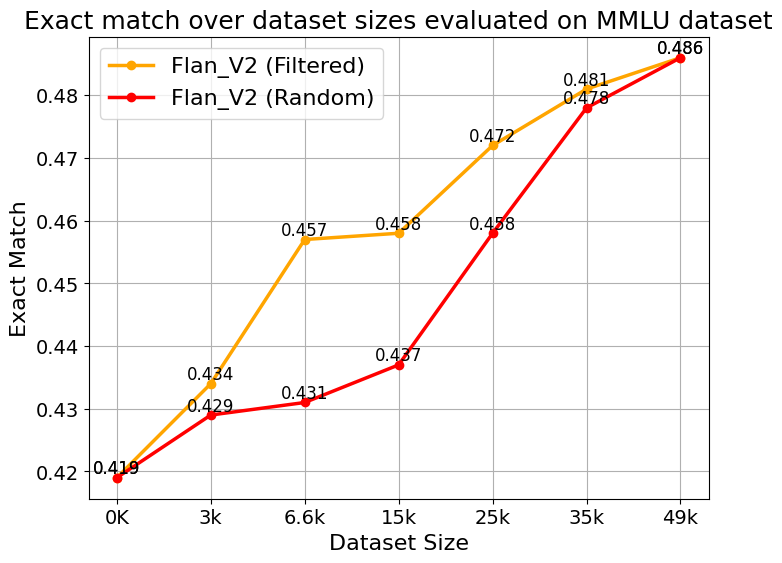

In [4]:
import matplotlib.pyplot as plt

# 数据
filtered = [0.419, 0.434, 0.457, 0.458, 0.472, 0.481, 0.486]
random = [0.419, 0.429, 0.431, 0.437, 0.458, 0.478, 0.486]

# X轴标签（数据集大小）
x_labels = ['0K', '3k', '6.6k', '15k', '25k', '35k', '49k']

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x_labels, filtered, label='Flan_V2 (Filtered)', marker='o', color='orange', linewidth=2.5)
plt.plot(x_labels, random, label='Flan_V2 (Random)', marker='o', color='red', linewidth=2.5)

# 在每个点上添加数值标签
for i, value in enumerate(filtered):
    plt.text(x_labels[i], value, f'{value:.3f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate(random):
    plt.text(x_labels[i], value, f'{value:.3f}', ha='center', va='bottom', fontsize=12)

# 添加标题和标签
plt.title('Exact match over dataset sizes evaluated on MMLU dataset', fontsize=18)
plt.xlabel('Dataset Size', fontsize=16)
plt.ylabel('Exact Match', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)  # 调整横轴数字的大小
plt.yticks(fontsize=14)  # 调整横轴数字的大小

# 添加网格
plt.grid(True)

# 显示图表
plt.show()


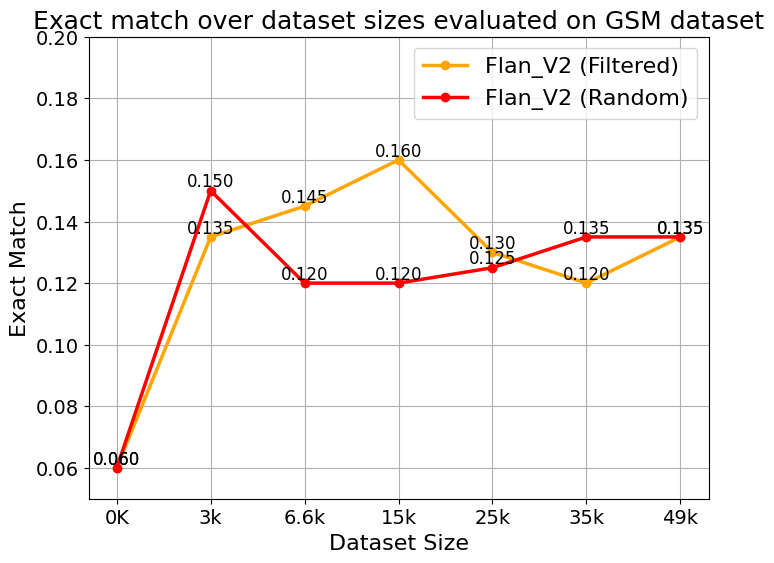

In [8]:
import matplotlib.pyplot as plt

# 数据
filtered = [0.06, 0.135, 0.145, 0.16, 0.13,  0.12, 0.135]
random = [0.06, 0.15, 0.12, 0.12, 0.125,  0.135, 0.135]
# X轴标签（数据集大小）
x_labels = ['0K', '3k', '6.6k', '15k', '25k', '35k', '49k']

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x_labels, filtered, label='Flan_V2 (Filtered)', marker='o', color='orange', linewidth=2.5)
plt.plot(x_labels, random, label='Flan_V2 (Random)', marker='o', color='red', linewidth=2.5)

# 在每个点上添加数值标签
for i, value in enumerate(filtered):
    plt.text(x_labels[i], value, f'{value:.3f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate(random):
    plt.text(x_labels[i], value, f'{value:.3f}', ha='center', va='bottom', fontsize=12)

# 添加标题和标签
plt.title('Exact match over dataset sizes evaluated on GSM dataset', fontsize=18)
plt.xlabel('Dataset Size', fontsize=16)
plt.ylabel('Exact Match', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)  # 调整横轴数字的大小
plt.yticks(fontsize=14)  # 调整横轴数字的大小
plt.ylim(0.05, 0.2)
# 添加网格
plt.grid(True)

# 显示图表
plt.show()


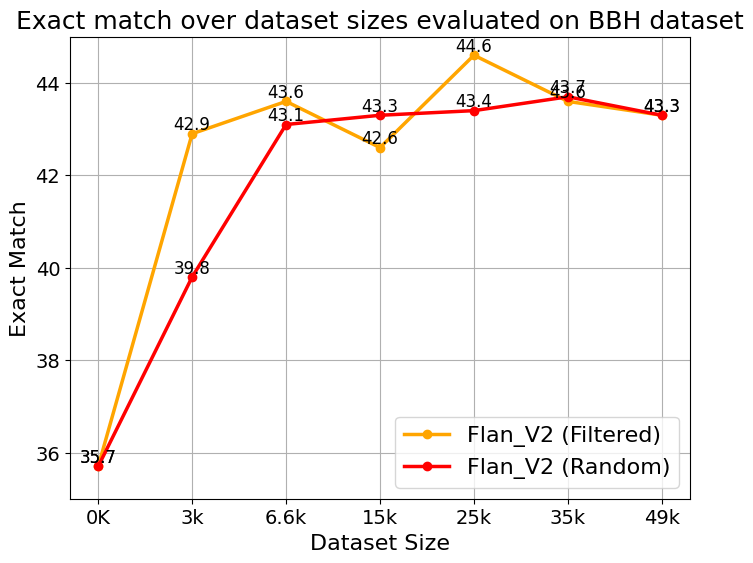

In [3]:
import matplotlib.pyplot as plt

# 数据
filtered = [35.7, 42.9, 43.6, 42.6, 44.6, 43.6, 43.3] 
random = [35.7, 39.8, 43.1, 43.3, 43.4, 43.7, 43.3]

# X轴标签（数据集大小）
x_labels = ['0K','3k', '6.6k', '15k', '25k', '35k', '49k']

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x_labels, filtered, label='Flan_V2 (Filtered)', marker='o', color='orange', linewidth=2.5)
plt.plot(x_labels, random, label='Flan_V2 (Random)', marker='o', color='red', linewidth=2.5)

# 在每个点上添加数值标签
for i, value in enumerate(filtered):
    plt.text(x_labels[i], value, f'{value:.1f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate(random):
    plt.text(x_labels[i], value, f'{value:.1f}', ha='center', va='bottom', fontsize=12)

# 添加标题和标签
plt.title('Exact match over dataset sizes evaluated on BBH dataset', fontsize=18)
plt.xlabel('Dataset Size', fontsize=16)
plt.ylabel('Exact Match', fontsize=16)
plt.legend(fontsize=16)

# 调整横轴和纵轴的数字大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 调整y轴的范围
plt.ylim(35, 45)  # 根据数据范围设置合适的y轴范围

# 添加网格
plt.grid(True)

# 显示图表
plt.show()


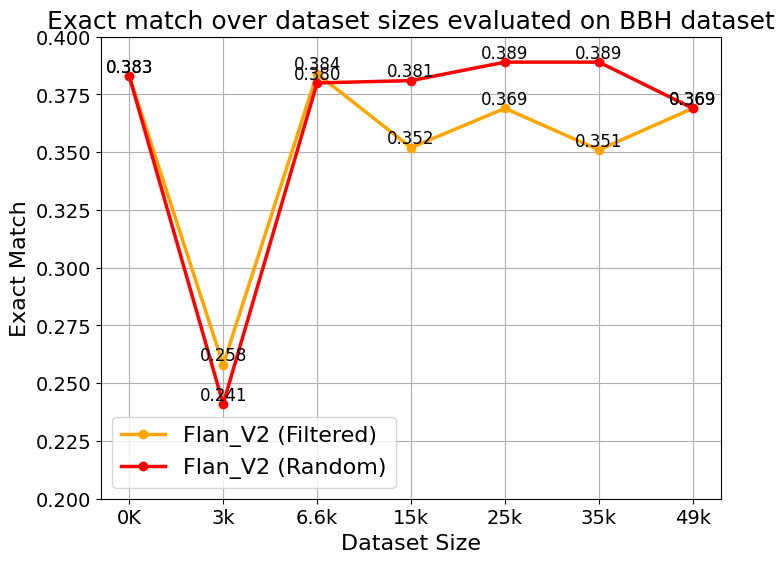

In [13]:
import matplotlib.pyplot as plt

dataset_name ='BBH'

filtered =[0.383, 0.258, 0.384 , 0.352, 0.369, 0.351, 0.369] 
random=[0.383, 0.241, 0.380, 0.381, 0.389, 0.389, 0.369]
# X轴标签（数据集大小）
x_labels = ['0K', '3k', '6.6k', '15k', '25k', '35k', '49k']

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x_labels, filtered, label='Flan_V2 (Filtered)', marker='o', color='orange', linewidth=2.5)
plt.plot(x_labels, random, label='Flan_V2 (Random)', marker='o', color='red', linewidth=2.5)

# 在每个点上添加数值标签
for i, value in enumerate(filtered):
    plt.text(x_labels[i], value, f'{value:.3f}', ha='center', va='bottom', fontsize=12)

for i, value in enumerate(random):
    plt.text(x_labels[i], value, f'{value:.3f}', ha='center', va='bottom', fontsize=12)

# 添加标题和标签
plt.title(f'Exact match over dataset sizes evaluated on {dataset_name} dataset', fontsize=18)
plt.xlabel('Dataset Size', fontsize=16)
plt.ylabel('Exact Match', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)  # 调整横轴数字的大小
plt.yticks(fontsize=14)  # 调整横轴数字的大小
plt.ylim(0.2, 0.4)
# 添加网格
plt.grid(True)

# 显示图表
plt.show()


In [ ]:
from datasets import load_dataset, Dataset

# 读取单个 Parquet 文件
dataset = load_dataset('parquet', data_files='tulu_split_parquet/sharegpt.parquet')
dataset = dataset['train']

idx = 200

# 计算每个子数据集的大小
total_size = len(dataset)
split_size = total_size // idx
remainder = total_size % idx

# 创建子数据集并保存到 Parquet 文件
start_idx = 0
for i in range(idx):
    end_idx = start_idx + split_size + (1 if i < remainder else 0)  # 分配余数给前面的子集
    subset = dataset.select(range(start_idx, end_idx))
    subset.to_parquet(f'tulu_split_parquet/sharegpt/sharegpt_{i+1}.parquet')
    print(f"Split {i+1}: {len(subset)} samples")
    start_idx = end_idx


In [9]:
import json

data_type = 'filtered'
labeling_model = 'gemma'
dataset_name = 'flan_v2'
file_path = f"/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/labeling/data/{labeling_model}/{dataset_name}/{data_type}_dataset.json"

total_records = 0

# 逐行读取文件内容并解析
with open(file_path, 'r') as file:
    for line_number, line in enumerate(file, start=1):
        try:
            data = json.loads(line)
            total_records += 1
        except json.JSONDecodeError as e:
            print(f"JSONDecodeError on line {line_number}: {e}")
            break

print(f"Total number of records: {total_records}")


Total number of records: 136


In [2]:
from datasets import load_dataset

# 使用 load_dataset 加载 Parquet 文件
dataset = load_dataset('parquet', data_files='/home/azureuser/cloudfiles/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/open-instruct/data_refine/tulu_split_parquet/gpt4_alpaca.parquet')

# 转换为 pandas DataFrame
df = dataset['train']

# 查看加载的数据
# print(df.head())


In [4]:
df[0]


{'dataset': 'gpt4_alpaca',
 'id': 'gpt4_alpaca_0',
 'messages': [{'role': 'user',
   'content': 'Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nCompose a tweet about a new project you are working on.\n\n### Input:\nI am developing a new web application to help people find local events.\n\n### Response:'},
  {'role': 'assistant',
   'content': "🆕Exciting things are happening! I'm currently working on a brand-new web application that will make finding local events easier than ever. Keep an eye out for updates on my progress! #webapp #localevents #newproject🎉"}]}

In [5]:
from datasets import load_dataset

# 使用 load_dataset 加载 Parquet 文件
dataset = load_dataset('tatsu-lab/alpaca')

# 转换为 pandas DataFrame
df = dataset['train']

# 查看加载的数据

Generating train split: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52002/52002 [00:00<00:00, 633411.83 examples/s]


In [10]:
df['instruction']

['Give three tips for staying healthy.',
 'What are the three primary colors?',
 'Describe the structure of an atom.',
 'How can we reduce air pollution?',
 'Describe a time when you had to make a difficult decision.',
 'Identify the odd one out.',
 'Explain why the following fraction is equivalent to 1/4',
 'Write a short story in third person narration about a protagonist who has to make an important career decision.',
 'Render a 3D model of a house',
 'Evaluate this sentence for spelling and grammar mistakes',
 'How did Julius Caesar die?',
 'What is the capital of France?',
 'Generate a list of ten items a person might need for a camping trip',
 'Discuss the causes of the Great Depression',
 'Classify the following into animals, plants, and minerals',
 'Explain the use of word embeddings in Natural Language Processing',
 'Describe the function of a computer motherboard',
 'Reverse engineer this code to create a new version',
 'Propose an ethical solution to the problem of data priv